In [ ]:
%pip install missingno

In [ ]:
%pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=30a45b75bc16d2b7dedcf71dab085dff070d02d83d49e3ab29d2e757bfd1994c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [ ]:
import missingno as msno
from ydata_profiling import ProfileReport

In [ ]:
from sklearn.preprocessing import LabelEncoder # convierte el texto a numeros
from sklearn.svm import SVC #maquina soporte vectorial
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/datasets_pandas_scikit_learn_spark-master/Liver Hepatocellular Carcinoma (AMC, Hepatology 2014).csv', sep=',', header=0)
df.head()

,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype
0,4,44,86.9,DiseaseFree,62,I,Living,88.9,NBNC
1,3,59,38.1,Recurred,115,II,Living,88.9,NBNC
2,2,41,83.5,DiseaseFree,55,IIII,Living,88.1,HBV
3,2,44,10.3,Recurred,75,III,Deceased,58.2,NBNC
4,4,56,26.1,Recurred,44,IIII,Deceased,43.1,HCV


In [ ]:
df.dtypes

Cirrhosis                           int64
Diagnosis Age                       int64
Disease Free (Months)             float64
Disease Free Status                object
Mutation Count                      int64
Neoplasm Histologic Grade          object
Overall Survival Status            object
Overall Survival (Months)         float64
Tumor Other Histologic Subtype     object
dtype: object

<Axes: >

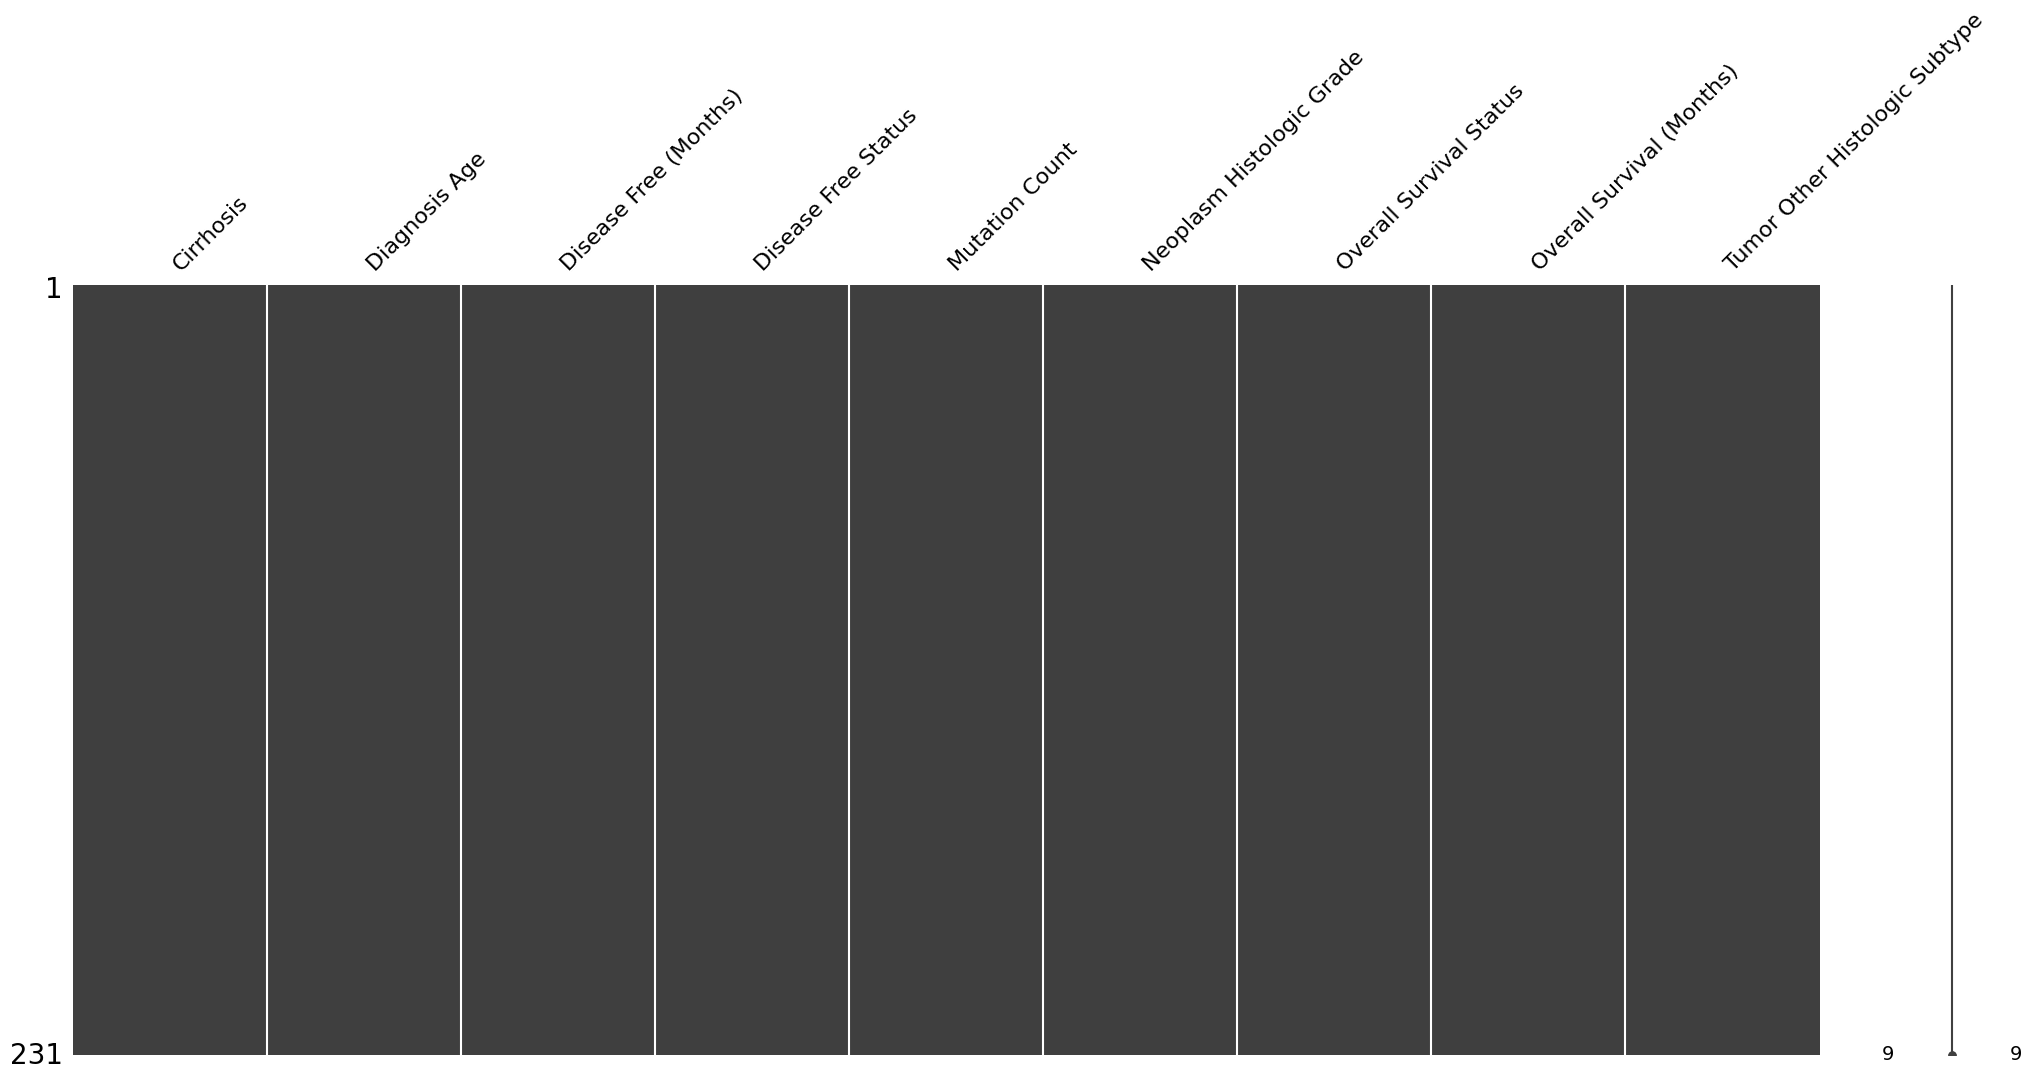

In [ ]:
msno.matrix(df)

<Axes: >

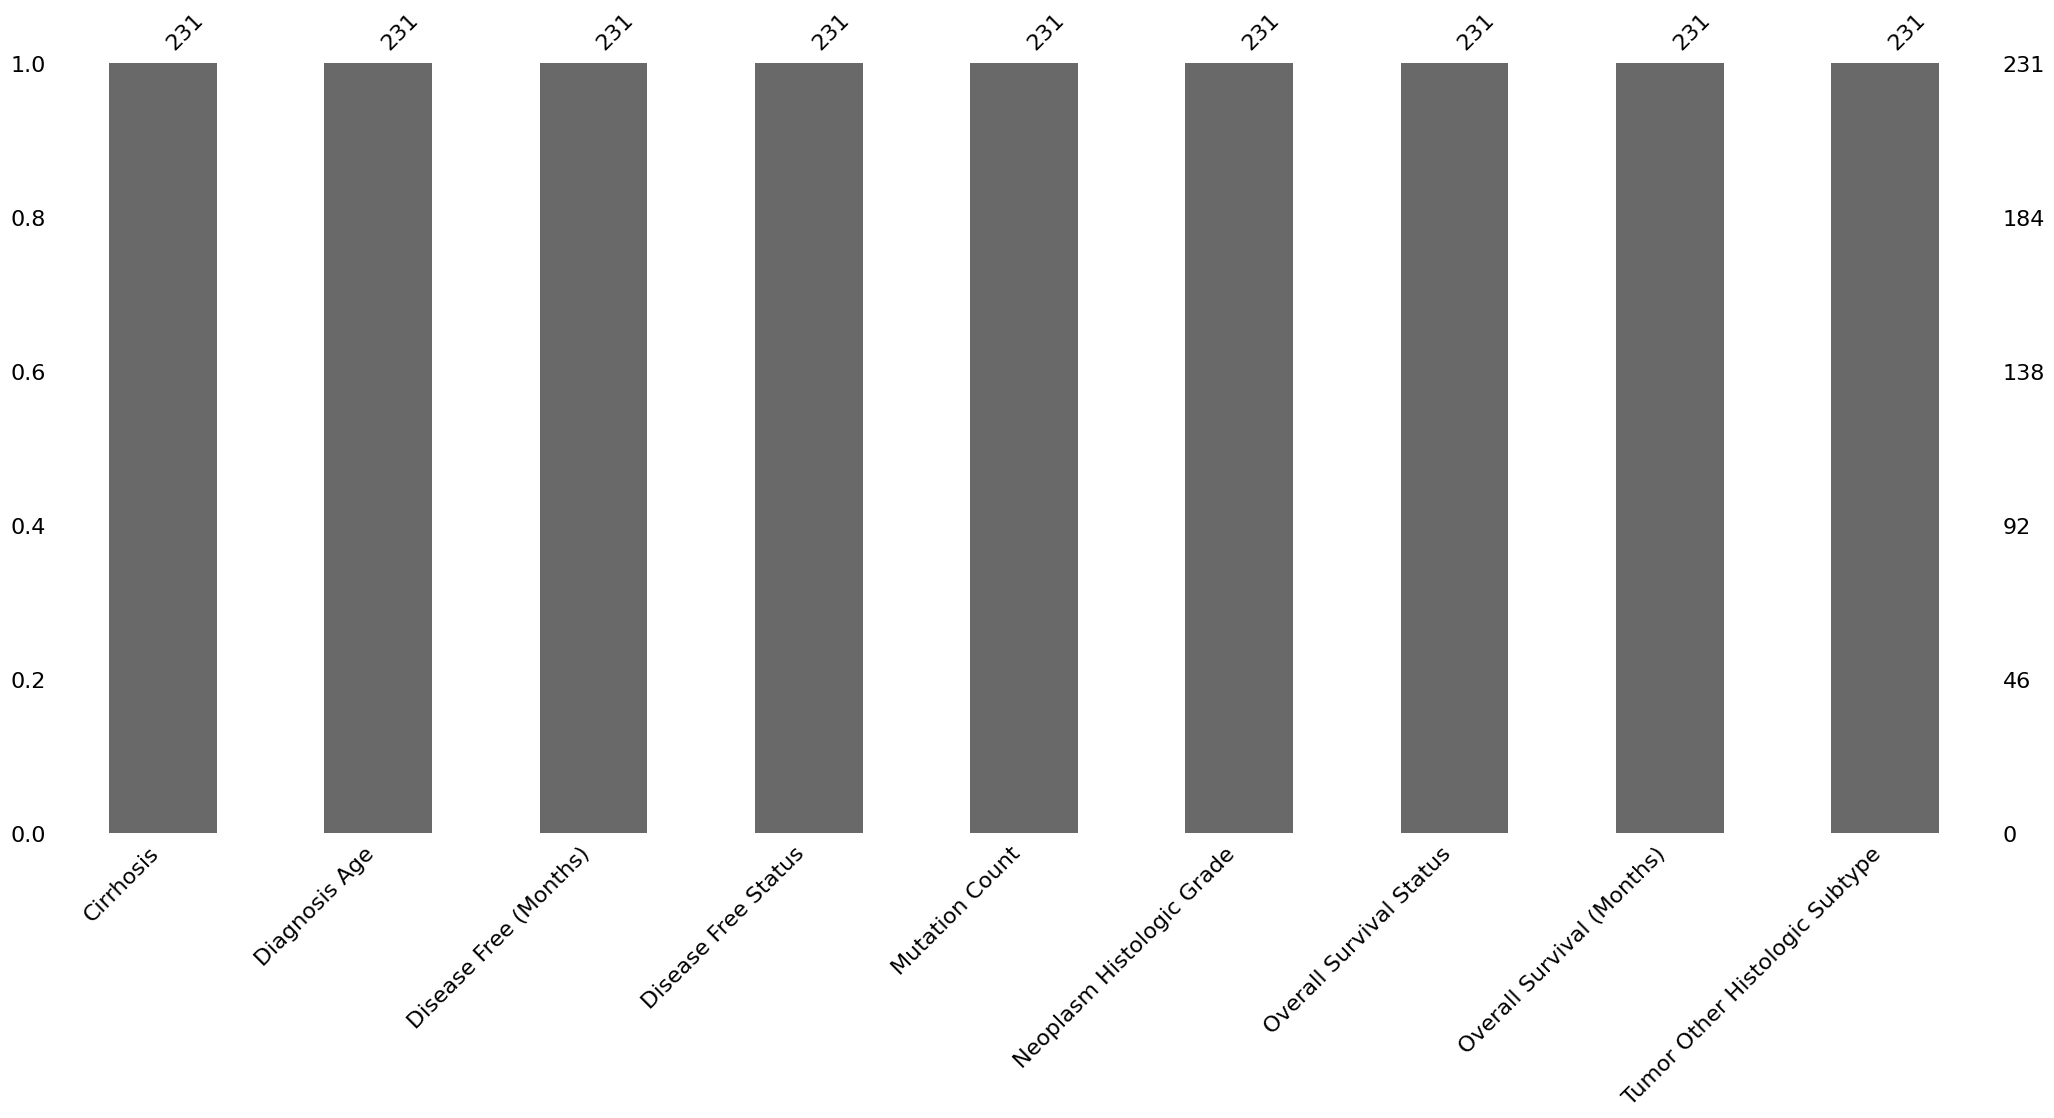

In [ ]:
msno.bar(df)

In [ ]:
profile = ProfileReport(df, title='Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
features = ['Cirrhosis',	'Diagnosis Age',	'Disease Free (Months)',	'dfs', 'Mutation Count','nhg','Overall Survival (Months)','tohs']
label = 'Overall Survival Status'

In [ ]:
from joblib import dump, load
import joblib
# dump -> save model
# load -> load model
joblib.__version__

'1.3.2'

In [ ]:
le1 = LabelEncoder()
df['dfs'] = le1.fit_transform(df['Disease Free Status'])
dump(le1, 'le1.joblib')

le2 = LabelEncoder()
df['nhg'] = le2.fit_transform(df['Neoplasm Histologic Grade'])
dump(le2, 'le2.joblib')

le3 = LabelEncoder()
df['oss'] = le3.fit_transform(df[label])
dump(le3, 'le3.joblib')

le4 = LabelEncoder()
df['tohs'] = le4.fit_transform(df['Tumor Other Histologic Subtype'])
dump(le4, 'le4.joblib')

In [ ]:
df.head(3)

,Cirrhosis,Diagnosis Age,Disease Free (Months),Disease Free Status,Mutation Count,Neoplasm Histologic Grade,Overall Survival Status,Overall Survival (Months),Tumor Other Histologic Subtype,dfs,nhg,oss,tohs
0,4,44,86.9,DiseaseFree,62,I,Living,88.9,NBNC,0,0,1,2
1,3,59,38.1,Recurred,115,II,Living,88.9,NBNC,1,1,1,2
2,2,41,83.5,DiseaseFree,55,IIII,Living,88.1,HBV,0,3,1,0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df[features], df.oss, test_size=0.20, random_state=0, stratify=df.oss)

class_weights = len(ytrain) / (len(np.unique(ytrain)) * np.bincount(ytrain))
sample_weights = class_weights[ytrain]

In [ ]:
xtrain.shape # (184, 8) -> 0.80
xtest.shape # (47, 8) -> 0.20
len(ytrain) # 184
len(ytest) # 47

47

# Maquina de Soporte Vectrail

In [ ]:
svm = SVC(probability=True, class_weight='balanced')
modelo = svm.fit(xtrain, ytrain)
prediccion = modelo.predict(xtest)

In [ ]:
prediccion
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

0 0
0 1
0 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
0 1
0 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 1
1 1
0 0
1 1


Living      194
Deceased     37
Name: Overall Survival Status, dtype: int64

score:  0.6382978723404256
recall_score:  0.6382978723404256
accuracy_score:  0.6382978723404256
f1_score:  0.6382978723404256

classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        25
           1       0.56      1.00      0.72        22

    accuracy                           0.64        47
   macro avg       0.78      0.66      0.60        47
weighted avg       0.80      0.64      0.60        47



<Axes: >

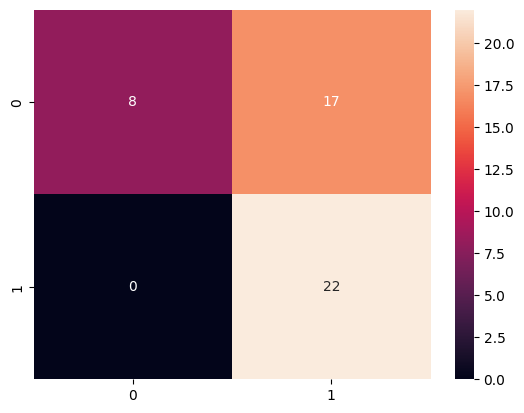

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalanceado recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

##### Otros estadisticos a evaluar
- accuracy_score
- confusion_matrix
- f1_score
- recall_score

In [ ]:
data = {'Cirrhosis':3,	'Diagnosis Age':48,	'Disease Free (Months)':82.9,	'dfs':0, 'Mutation Count':65, 'nhg':1, 'Overall Survival (Months)':86.9, 'tohs':2}

p = pd.DataFrame(data, index=[0])
np = modelo.predict(p)
le3.inverse_transform(np.tolist())
# datadrif si alucina

array(['Living'], dtype=object)

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crea el modelo RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, class_weight='balanced')
modelo.fit(xtrain, ytrain) #sample_weight=sample_weights
prediccion = modelo.predict(xtest)

Living      194
Deceased     37
Name: Overall Survival Status, dtype: int64

score:  0.8723404255319149
recall_score:  0.8723404255319149
accuracy_score:  0.8723404255319149
f1_score:  0.8723404255319149

classification_report: 
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.95      0.90      0.92        41

    accuracy                           0.87        47
   macro avg       0.72      0.78      0.75        47
weighted avg       0.89      0.87      0.88        47



<Axes: >

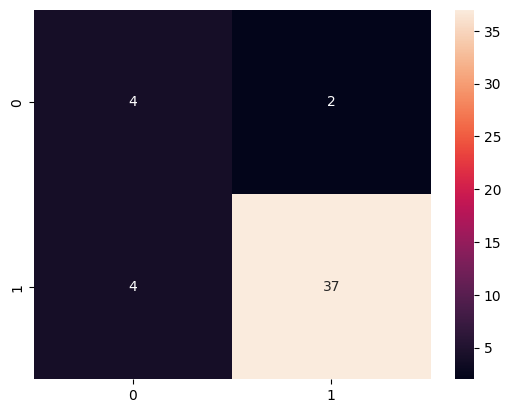

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

# Arboles de decicion
clasificacion basados en reglas
#### Ventajas
- puede resolver problemas no lineales

#### Desventajas
- overfiting
- pueden ser caros

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
modelo = dtc.fit(xtrain, ytrain, sample_weight=sample_weights)
prediccion = modelo.predict(xtest)

In [ ]:
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

0 0
0 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
0 1
1 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 0
1 1


Living      194
Deceased     37
Name: Overall Survival Status, dtype: int64

score:  0.8297872340425532
recall_score:  0.8297872340425532
accuracy_score:  0.8297872340425532
f1_score:  0.8297872340425532
classification_report: 
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.82      0.97      0.89        33

    accuracy                           0.83        47
   macro avg       0.85      0.73      0.76        47
weighted avg       0.84      0.83      0.81        47



<Axes: >

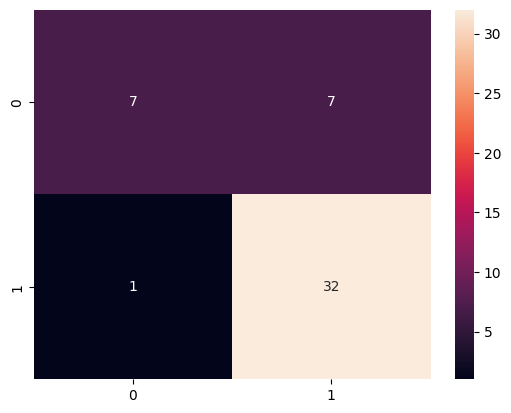

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

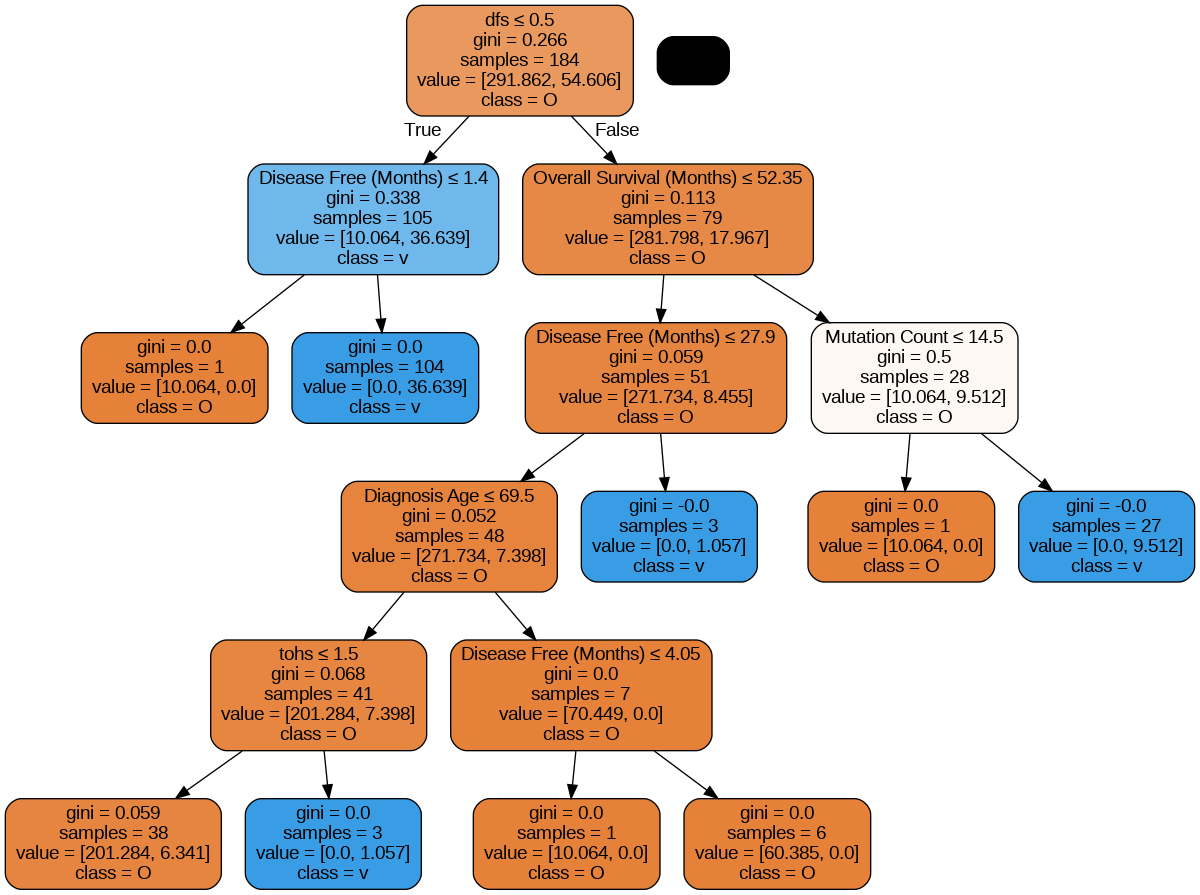

In [ ]:
dot_data = export_graphviz(modelo, out_file=None, feature_names=features, class_names=label, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
modelo = gbc.fit(xtrain, ytrain, sample_weight=sample_weights)
prediccion = modelo.predict(xtest)
dump(modelo,'modelo.joblib')

Living      194
Deceased     37
Name: Overall Survival Status, dtype: int64

score:  0.8723404255319149
recall_score:  0.8723404255319149
accuracy_score:  0.8723404255319149
f1_score:  0.8723404255319149
classification_report: 
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.87      0.97      0.92        35

    accuracy                           0.87        47
   macro avg       0.87      0.78      0.81        47
weighted avg       0.87      0.87      0.86        47



<Axes: >

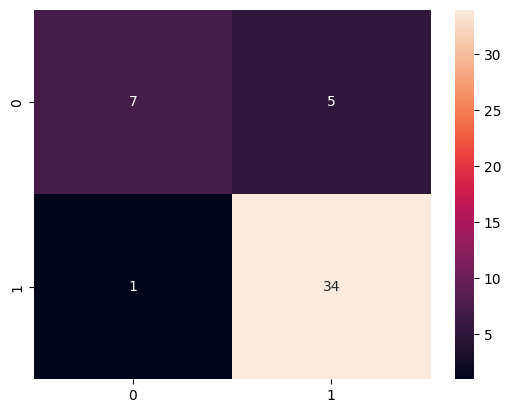

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

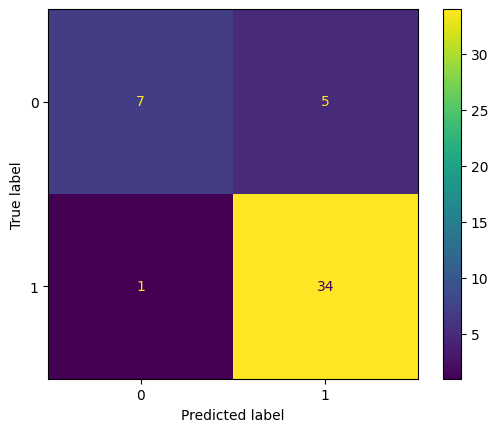

In [ ]:
vis = ConfusionMatrixDisplay(cf)
vis.plot()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Crea el modelo Naive Bayes (en este caso, Gaussian Naive Bayes)
modelo = GaussianNB()

# Entrena el modelo con los datos de entrenamiento
modelo.fit(xtrain, ytrain, sample_weight=sample_weights)

# Realiza predicciones en el conjunto de prueba
predictions = modelo.predict(xtest)

Living      194
Deceased     37
Name: Overall Survival Status, dtype: int64

score:  0.851063829787234
recall_score:  0.8723404255319149
accuracy_score:  0.8723404255319149
f1_score:  0.8723404255319149
classification_report: 
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.87      0.97      0.92        35

    accuracy                           0.87        47
   macro avg       0.87      0.78      0.81        47
weighted avg       0.87      0.87      0.86        47



<Axes: >

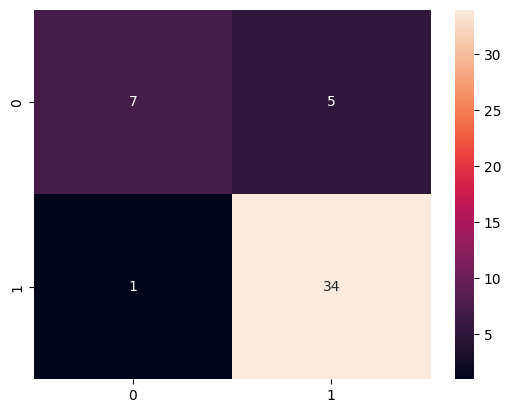

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

|    recall    |   SVM     | randomForest | DecisionTree |GradientBoosting|naive bayes|
|--------------|-----------|--------------|--------------|----------------|-----------|
|       0      |   0.32    |     0.67     |    0.50      |     0.58       |   0.58         |   
|       1      |   1.00    |     0.90     |    0.97      |     0.97       |   0.97         |
|   accuracy   |   0.64    |     0.87     |    0.83      |     0.87       |   0.87         |

El mejor clasificador fue GradientBoostingClassifier y naive bayes, tambien random forest, le sigue DecisionTreeClassifier y el peor fue SVC